In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import plotly.graph_objects as go

In [106]:
#import pandas as pd
#import glob

#path = r'C:\Users\prate\Documents\IE\Assignment1\Data\DroughtWise\rainfall' # use your path
#all_files = glob.glob(path + "/*.csv")

#li = []

#for filename in all_files:
#    df = pd.read_csv(filename, index_col=None, header=0)
#    li.append(df)

#frame = pd.concat(li, axis=0, ignore_index=True)

In [2]:
df1 = pd.read_csv("bacchus-merrimu.csv")
df1 = df1[['Year', 'Annual']] #selecting only two columns for the final dataset
df1 = df1[(df1['Year'] > 1990) & (df1['Year']<2019)]
if df1['Annual'].isnull().sum() < len(df1['Annual'])*0.3:
    df1['Annual'].fillna((df1['Annual'].mean()), inplace=True) 
else:
    df1['Annual'].fillna((df1['Annual'].median()), inplace=True)
    
df1.columns = ['Year', 'Bacchus Merrimu']

In [3]:
df2 = pd.read_csv("bairnsdale.csv")
df2 = df2[['Year', 'Annual']] #selecting only two columns for the final dataset
df2 = df2[(df2['Year'] > 1990) & (df2['Year']<2019)]
if df2['Annual'].isnull().sum() < len(df2['Annual'])*0.3:
    df2['Annual'].fillna((df2['Annual'].mean()), inplace=True) 
else:
    df2['Annual'].fillna((df2['Annual'].median()), inplace=True)
    
df2.columns = ['Year', 'Bairnsdale']

In [4]:
df3 = pd.read_csv("ballarat.csv")
df3 = df3[['Year', 'Annual']] #selecting only two columns for the final dataset
df3 = df3[(df3['Year'] > 1990) & (df3['Year']<2019)]
if df3['Annual'].isnull().sum() < len(df3['Annual'])*0.3:
    df3['Annual'].fillna((df3['Annual'].mean()), inplace=True) 
else:
    df3['Annual'].fillna((df3['Annual'].median()), inplace=True)
    
df3.columns = ['Year', 'Ballarat']

In [5]:
df4 = pd.read_csv("bendigo.csv")
df4 = df4[['Year', 'Annual']] #selecting only two columns for the final dataset
df4 = df4[(df4['Year'] > 1990) & (df4['Year']<2019)]
if df4['Annual'].isnull().sum() < len(df4['Annual'])*0.3:
    df4['Annual'].fillna((df4['Annual'].mean()), inplace=True) 
else:
    df4['Annual'].fillna((df4['Annual'].median()), inplace=True)
    
df4.columns = ['Year', 'Bendigo']

In [6]:
df5 = pd.read_csv("buchan.csv")
df5 = df5[['Year', 'Annual']] #selecting only two columns for the final dataset
df5 = df5[(df5['Year'] > 1990) & (df5['Year']<2019)]
if df5['Annual'].isnull().sum() < len(df5['Annual'])*0.3:
    df5['Annual'].fillna((df5['Annual'].mean()), inplace=True) 
else:
    df5['Annual'].fillna((df5['Annual'].median()), inplace=True)
    
df5.columns = ['Year', 'Buchan']

In [7]:
df6 = pd.read_csv("caufield.csv")
df6 = df6[['Year', 'Annual']] #selecting only two columns for the final dataset
df6 = df6[(df6['Year'] > 1990) & (df6['Year']<2019)]
if df6['Annual'].isnull().sum() < len(df6['Annual'])*0.3:
    df6['Annual'].fillna((df6['Annual'].mean()), inplace=True) 
else:
    df6['Annual'].fillna((df6['Annual'].median()), inplace=True)
    
df6.columns = ['Year', 'Caufield']

In [8]:
df7 = pd.read_csv("colac.csv")
df7 = df7[['Year', 'Annual']] #selecting only two columns for the final dataset
df7 = df7[(df7['Year'] > 1990) & (df7['Year']<2019)]
if df7['Annual'].isnull().sum() < len(df7['Annual'])*0.3:
    df7['Annual'].fillna((df7['Annual'].mean()), inplace=True) 
else:
    df7['Annual'].fillna((df7['Annual'].median()), inplace=True)
    
df7.columns = ['Year', 'Colac']

In [9]:
df8 = pd.read_csv("corryong-narielcreek.csv")
df8 = df8[['Year', 'Annual']] #selecting only two columns for the final dataset
df8 = df8[(df8['Year'] > 1990) & (df8['Year']<2019)]
if df8['Annual'].isnull().sum() < len(df8['Annual'])*0.3:
    df8['Annual'].fillna((df8['Annual'].mean()), inplace=True) 
else:
    df8['Annual'].fillna((df8['Annual'].median()), inplace=True)
    
df8.columns = ['Year', 'Corryong Narielcreek']

In [10]:
df9 = pd.read_csv("dargo.csv")
df9 = df9[['Year', 'Annual']] #selecting only two columns for the final dataset
df9 = df9[(df9['Year'] > 1990) & (df9['Year']<2019)]
if df9['Annual'].isnull().sum() < len(df9['Annual'])*0.3:
    df9['Annual'].fillna((df9['Annual'].mean()), inplace=True) 
else:
    df9['Annual'].fillna((df9['Annual'].median()), inplace=True)
    
df9.columns = ['Year', 'Dargo']

In [11]:
df10 = pd.read_csv("daylesford.csv")
df10 = df10[['Year', 'Annual']] #selecting only two columns for the final dataset
df10 = df10[(df10['Year'] > 1990) & (df10['Year']<2019)]
if df10['Annual'].isnull().sum() < len(df10['Annual'])*0.3:
    df10['Annual'].fillna((df10['Annual'].mean()), inplace=True) 
else:
    df10['Annual'].fillna((df10['Annual'].median()), inplace=True)
    
df10.columns = ['Year', 'Daylesford']

In [12]:
df11 = pd.read_csv("echuca aerodrome.csv")
df11 = df11[['Year', 'Annual']] #selecting only two columns for the final dataset
df11 = df11[(df11['Year'] > 1990) & (df11['Year']<2019)]
if df11['Annual'].isnull().sum() < len(df11['Annual'])*0.3:
    df11['Annual'].fillna((df11['Annual'].mean()), inplace=True) 
else:
    df11['Annual'].fillna((df11['Annual'].median()), inplace=True)
    
df11.columns = ['Year', 'Echuca Aerodrome']

In [13]:
df12 = pd.read_csv("edenhope.csv")
df12 = df12[['Year', 'Annual']] #selecting only two columns for the final dataset
df12 = df12[(df12['Year'] > 1990) & (df12['Year']<2019)]
if df12['Annual'].isnull().sum() < len(df12['Annual'])*0.3:
    df12['Annual'].fillna((df12['Annual'].mean()), inplace=True) 
else:
    df12['Annual'].fillna((df12['Annual'].median()), inplace=True)
    
df12.columns = ['Year', 'Edenhope']

In [14]:
df13 = pd.read_csv("euroa.csv")
df13 = df13[['Year', 'Annual']] #selecting only two columns for the final dataset
df13 = df13[(df13['Year'] > 1990) & (df13['Year']<2019)]
if df13['Annual'].isnull().sum() < len(df13['Annual'])*0.3:
    df13['Annual'].fillna((df13['Annual'].mean()), inplace=True) 
else:
    df13['Annual'].fillna((df13['Annual'].median()), inplace=True)
    
df13.columns = ['Year', 'Euroa']

In [15]:
df14 = pd.read_csv("frankston-cranbourne.csv")
df14 = df14[['Year', 'Annual']] #selecting only two columns for the final dataset
df14 = df14[(df14['Year'] > 1990) & (df14['Year']<2019)]
if df14['Annual'].isnull().sum() < len(df14['Annual'])*0.3:
    df14['Annual'].fillna((df14['Annual'].mean()), inplace=True) 
else:
    df14['Annual'].fillna((df14['Annual'].median()), inplace=True)
    
df14.columns = ['Year', 'Frankston Cranbourne']

In [16]:
df15 = pd.read_csv("geelong-bannockburn.csv")
df15 = df15[['Year', 'Annual']] #selecting only two columns for the final dataset
df15 = df15[(df15['Year'] > 1990) & (df15['Year']<2019)]
if df15['Annual'].isnull().sum() < len(df15['Annual'])*0.3:
    df15['Annual'].fillna((df15['Annual'].mean()), inplace=True) 
else:
    df15['Annual'].fillna((df15['Annual'].median()), inplace=True)
    
df15.columns = ['Year', 'Geelong Bannockburn']

In [17]:
df16 = pd.read_csv("hamilton_airport.csv")
df16 = df16[['Year', 'Annual']] #selecting only two columns for the final dataset
df16 = df16[(df16['Year'] > 1990) & (df16['Year']<2019)]
if df16['Annual'].isnull().sum() < len(df16['Annual'])*0.3:
    df16['Annual'].fillna((df16['Annual'].mean()), inplace=True) 
else:
    df16['Annual'].fillna((df16['Annual'].median()), inplace=True)
    
df16.columns = ['Year', 'Hamilton Airport']

In [18]:
df17 = pd.read_csv("horsham.csv")
df17 = df17[['Year', 'Annual']] #selecting only two columns for the final dataset
df17 = df17[(df17['Year'] > 1990) & (df17['Year']<2019)]
if df17['Annual'].isnull().sum() < len(df17['Annual'])*0.3:
    df17['Annual'].fillna((df17['Annual'].mean()), inplace=True) 
else:
    df17['Annual'].fillna((df17['Annual'].median()), inplace=True)
    
df17.columns = ['Year', 'Horsham']

In [19]:
df18 = pd.read_csv("kerang.csv")
df18 = df18[['Year', 'Annual']] #selecting only two columns for the final dataset
df18 = df18[(df18['Year'] > 1990) & (df18['Year']<2019)]
if df18['Annual'].isnull().sum() < len(df18['Annual'])*0.3:
    df18['Annual'].fillna((df18['Annual'].mean()), inplace=True) 
else:
    df18['Annual'].fillna((df18['Annual'].median()), inplace=True)
    
df18.columns = ['Year', 'Kerang']

In [20]:
df19 = pd.read_csv("lascelles.csv")
df19 = df19[['Year', 'Annual']] #selecting only two columns for the final dataset
df19 = df19[(df19['Year'] > 1990) & (df19['Year']<2019)]
if df19['Annual'].isnull().sum() < len(df19['Annual'])*0.3:
    df19['Annual'].fillna((df19['Annual'].mean()), inplace=True) 
else:
    df19['Annual'].fillna((df19['Annual'].median()), inplace=True)
    
df19.columns = ['Year', 'Lascelles']

In [21]:
df20 = pd.read_csv("mansfield.csv")
df20 = df20[['Year', 'Annual']] #selecting only two columns for the final dataset
df20 = df20[(df20['Year'] > 1990) & (df20['Year']<2019)]
if df20['Annual'].isnull().sum() < len(df20['Annual'])*0.3:
    df20['Annual'].fillna((df20['Annual'].mean()), inplace=True) 
else:
    df20['Annual'].fillna((df20['Annual'].median()), inplace=True)
    
df20.columns = ['Year', 'Mansfield']

In [22]:
df21 = pd.read_csv("maryborough.csv")
df21 = df21[['Year', 'Annual']] #selecting only two columns for the final dataset
df21 = df21[(df21['Year'] > 1990) & (df21['Year']<2019)]
if df21['Annual'].isnull().sum() < len(df21['Annual'])*0.3:
    df21['Annual'].fillna((df21['Annual'].mean()), inplace=True) 
else:
    df21['Annual'].fillna((df21['Annual'].median()), inplace=True)
    
df21.columns = ['Year', 'Maryorough']

In [23]:
df22 = pd.read_csv("mildura-irymple.csv")
df22 = df22[['Year', 'Annual']] #selecting only two columns for the final dataset
df22 = df22[(df22['Year'] > 1990) & (df22['Year']<2019)]
if df22['Annual'].isnull().sum() < len(df22['Annual'])*0.3:
    df22['Annual'].fillna((df22['Annual'].mean()), inplace=True) 
else:
    df22['Annual'].fillna((df22['Annual'].median()), inplace=True)
    
df22.columns = ['Year', 'Mildura Irymple']

In [24]:
df23 = pd.read_csv("mtbaw-noojee.csv")
df23 = df23[['Year', 'Annual']] #selecting only two columns for the final dataset
df23 = df23[(df23['Year'] > 1990) & (df23['Year']<2019)]
if df23['Annual'].isnull().sum() < len(df23['Annual'])*0.3:
    df23['Annual'].fillna((df23['Annual'].mean()), inplace=True) 
else:
    df23['Annual'].fillna((df23['Annual'].median()), inplace=True)
    
df23.columns = ['Year', 'Mtbaw Noojee']

In [25]:
df24 = pd.read_csv("murrayville.csv")
df24 = df24[['Year', 'Annual']] #selecting only two columns for the final dataset
df24 = df24[(df24['Year'] > 1990) & (df24['Year']<2019)]
if df24['Annual'].isnull().sum() < len(df24['Annual'])*0.3:
    df24['Annual'].fillna((df24['Annual'].mean()), inplace=True) 
else:
    df24['Annual'].fillna((df24['Annual'].median()), inplace=True)
    
df24.columns = ['Year', 'Murrayville']

In [26]:
df25 = pd.read_csv("orbost-betebolong.csv")
df25 = df25[['Year', 'Annual']] #selecting only two columns for the final dataset
df25 = df25[(df25['Year'] > 1990) & (df25['Year']<2019)]
if df25['Annual'].isnull().sum() < len(df25['Annual'])*0.3:
    df25['Annual'].fillna((df25['Annual'].mean()), inplace=True) 
else:
    df25['Annual'].fillna((df25['Annual'].median()), inplace=True)
    
df25.columns = ['Year', 'Orbost Betebolong']

In [27]:
df26 = pd.read_csv("ouyen-post-office.csv")
df26 = df26[['Year', 'Annual']] #selecting only two columns for the final dataset
df26 = df26[(df26['Year'] > 1990) & (df26['Year']<2019)]
if df26['Annual'].isnull().sum() < len(df26['Annual'])*0.3:
    df26['Annual'].fillna((df26['Annual'].mean()), inplace=True) 
else:
    df26['Annual'].fillna((df26['Annual'].median()), inplace=True)
    
df26.columns = ['Year', 'Ouyen Post Office']

In [28]:
df27 = pd.read_csv("portland.csv")
df27 = df27[['Year', 'Annual']] #selecting only two columns for the final dataset
df27 = df27[(df27['Year'] > 1990) & (df27['Year']<2019)]
df27 = df27.interpolate()
if df27['Annual'].isnull().sum() < len(df27['Annual'])*0.3:
    df27['Annual'].fillna((df27['Annual'].mean()), inplace=True) 
else:
    df27['Annual'].fillna((df27['Annual'].median()), inplace=True)
    
df27.columns = ['Year', 'Portland']

In [29]:
df28 = pd.read_csv("rainbow-werrap.csv")
df28 = df28[['Year', 'Annual']] #selecting only two columns for the final dataset
df28 = df28[(df28['Year'] > 1990) & (df28['Year']<2019)]
if df28['Annual'].isnull().sum() < len(df28['Annual'])*0.3:
    df28['Annual'].fillna((df28['Annual'].mean()), inplace=True) 
else:
    df28['Annual'].fillna((df28['Annual'].median()), inplace=True)
    
df28.columns = ['Year', 'Rainbow Werrap']

In [30]:
df29 = pd.read_csv("sale.csv")
df29 = df29[['Year', 'Annual']] #selecting only two columns for the final dataset
df29 = df29[(df29['Year'] > 1990) & (df29['Year']<2019)]
if df29['Annual'].isnull().sum() < len(df29['Annual'])*0.3:
    df29['Annual'].fillna((df29['Annual'].mean()), inplace=True) 
else:
    df29['Annual'].fillna((df29['Annual'].median()), inplace=True)
    
df29.columns = ['Year', 'Sale']

In [31]:
df30 = pd.read_csv("seymour.csv")
df30 = df30[['Year', 'Annual']] #selecting only two columns for the final dataset
df30 = df30[(df30['Year'] > 1990) & (df30['Year']<2019)]
if df30['Annual'].isnull().sum() < len(df30['Annual'])*0.3:
    df30['Annual'].fillna((df30['Annual'].mean()), inplace=True) 
else:
    df30['Annual'].fillna((df30['Annual'].median()), inplace=True)
    
df30.columns = ['Year', 'Seymour']

In [32]:
df31 = pd.read_csv("shepparton-mooroopna.csv")
df31 = df31[['Year', 'Annual']] #selecting only two columns for the final dataset
df31 = df31[(df31['Year'] > 1990) & (df31['Year']<2019)]
if df31['Annual'].isnull().sum() < len(df31['Annual'])*0.3:
    df31['Annual'].fillna((df31['Annual'].mean()), inplace=True) 
else:
    df31['Annual'].fillna((df31['Annual'].median()), inplace=True)
    
df31.columns = ['Year', 'Shepparton Mooroopna']

In [33]:
df32 = pd.read_csv("stawell-seppelt.csv")
df32 = df32[['Year', 'Annual']] #selecting only two columns for the final dataset
df32 = df32[(df32['Year'] > 1990) & (df32['Year']<2019)]
if df32['Annual'].isnull().sum() < len(df32['Annual'])*0.3:
    df32['Annual'].fillna((df32['Annual'].mean()), inplace=True) 
else:
    df32['Annual'].fillna((df32['Annual'].median()), inplace=True)
    
df32.columns = ['Year', 'Stawell Seppelt']

In [34]:
df33 = pd.read_csv("swanhill-lake_boga.csv")
df33 = df33[['Year', 'Annual']] #selecting only two columns for the final dataset
df33 = df33[(df33['Year'] > 1990) & (df33['Year']<2019)]
if df33['Annual'].isnull().sum() < len(df33['Annual'])*0.3:
    df33['Annual'].fillna((df33['Annual'].mean()), inplace=True) 
else:
    df33['Annual'].fillna((df33['Annual'].median()), inplace=True)
    
df33.columns = ['Year', 'Swanhill Lake Boga']

In [35]:
df34 = pd.read_csv("traralgon.csv")
df34 = df34[['Year', 'Annual']] #selecting only two columns for the final dataset
df34 = df34[(df34['Year'] > 1990) & (df34['Year']<2019)]
if df34['Annual'].isnull().sum() < len(df34['Annual'])*0.3:
    df34['Annual'].fillna((df34['Annual'].mean()), inplace=True) 
else:
    df34['Annual'].fillna((df34['Annual'].median()), inplace=True)
    
df34.columns = ['Year', 'Traralgon']

In [36]:
df35 = pd.read_csv("wangaratta.csv")
df35 = df35[['Year', 'Annual']] #selecting only two columns for the final dataset
df35 = df35[(df35['Year'] > 1990) & (df35['Year']<2019)]
if df35['Annual'].isnull().sum() < len(df35['Annual'])*0.3:
    df35['Annual'].fillna((df35['Annual'].mean()), inplace=True) 
else:
    df35['Annual'].fillna((df35['Annual'].median()), inplace=True)
    
df35.columns = ['Year', 'Wangartta']

In [37]:
df36 = pd.read_csv("warracknabeal-ailsa.csv")
df36 = df36[['Year', 'Annual']] #selecting only two columns for the final dataset
df36 = df36[(df36['Year'] > 1990) & (df36['Year']<2019)]
if df36['Annual'].isnull().sum() < len(df36['Annual'])*0.3:
    df36['Annual'].fillna((df36['Annual'].mean()), inplace=True) 
else:
    df36['Annual'].fillna((df36['Annual'].median()), inplace=True)
    
df36.columns = ['Year', 'Warracknabeal Ailsa']

In [38]:
df37 = pd.read_csv("warragul-drouin.csv")
df37 = df37[['Year', 'Annual']] #selecting only two columns for the final dataset
df37 = df37[(df37['Year'] > 1990) & (df37['Year']<2019)]
if df37['Annual'].isnull().sum() < len(df37['Annual'])*0.3:
    df37['Annual'].fillna((df37['Annual'].mean()), inplace=True) 
else:
    df37['Annual'].fillna((df37['Annual'].median()), inplace=True)
    
df37.columns = ['Year', 'Warragul Drouin']

In [39]:
df38 = pd.read_csv("warrnambool-nullawarre.csv")
df38 = df38[['Year', 'Annual']] #selecting only two columns for the final dataset
df38 = df38[(df38['Year'] > 1990) & (df38['Year']<2019)]
if df38['Annual'].isnull().sum() < len(df38['Annual'])*0.3:
    df38['Annual'].fillna((df38['Annual'].mean()), inplace=True) 
else:
    df38['Annual'].fillna((df38['Annual'].median()), inplace=True)
    
df38.columns = ['Year', 'Warrnambool Nullawarre']

In [40]:
#df39 = pd.read_csv("wodonga.csv")
#df39 = df39[['Year', 'Annual']] #selecting only two columns for the final dataset
#df39 = df39[(df39['Year'] > 1990) & (df39['Year']<2019)]
#if df39['Annual'].isnull().sum() < len(df39['Annual'])*0.3:
#    df39['Annual'].fillna((df39['Annual'].mean()), inplace=True) 
#else:
#    df39['Annual'].fillna((df39['Annual'].median()), inplace=True)
    
#df39.columns = ['Year', 'Wodonga']

In [41]:
df40 = pd.read_csv("wonthaggi.csv")
df40 = df40[['Year', 'Annual']] #selecting only two columns for the final dataset
df40 = df40[(df40['Year'] > 1990) & (df40['Year']<2019)]
if df40['Annual'].isnull().sum() < len(df40['Annual'])*0.3:
    df40['Annual'].fillna((df40['Annual'].mean()), inplace=True) 
else:
    df40['Annual'].fillna((df40['Annual'].median()), inplace=True)
    
df40.columns = ['Year', 'Wonthaggi']

In [42]:
df41 = pd.read_csv("yanakie-wilsons.csv")
df41 = df41[['Year', 'Annual']] #selecting only two columns for the final dataset
df41 = df41[(df41['Year'] > 1990) & (df41['Year']<2019)]
if df41['Annual'].isnull().sum() < len(df41['Annual'])*0.3:
    df41['Annual'].fillna((df41['Annual'].mean()), inplace=True) 
else:
    df41['Annual'].fillna((df41['Annual'].median()), inplace=True)
    
df41.columns = ['Year', 'Yanakie Wilsons']

In [43]:
df42 = pd.read_csv("yaraglen-toolangi.csv")
df42 = df42[['Year', 'Annual']] #selecting only two columns for the final dataset
df42 = df42[(df42['Year'] > 1990) & (df42['Year']<2019)]
if df42['Annual'].isnull().sum() < len(df42['Annual'])*0.3:
    df42['Annual'].fillna((df42['Annual'].mean()), inplace=True) 
else:
    df42['Annual'].fillna((df42['Annual'].median()), inplace=True)
    
df42.columns = ['Year', 'Yaraglen Toolangi']

In [44]:
df43 = pd.read_csv("bright-tawonga.csv")
df43 = df43[['Year', 'Annual']] #selecting only two columns for the final dataset
df43 = df43[(df43['Year'] > 1990) & (df43['Year']<2019)]
df43 = df43.interpolate()
if df43['Annual'].isnull().sum() < len(df43['Annual'])*0.3:
    df43['Annual'].fillna((df43['Annual'].mean()), inplace=True) 
else:
    df43['Annual'].fillna((df43['Annual'].median()), inplace=True)
    
df43.columns = ['Year', 'Bright Tawonga']

In [45]:
df = df1.merge(df2, how='left') 

In [46]:
df = df.merge(df3, how='left') 

In [47]:
df = df.merge(df4, how='left') 

In [48]:
df = df.merge(df43, how='left') 

In [49]:
df = df.merge(df5, how='left') 

In [50]:
df = df.merge(df6, how='left') 

In [51]:
df = df.merge(df7, how='left')

In [52]:
df = df.merge(df8, how='left') 

In [53]:
df = df.merge(df9, how='left') 

In [54]:
df = df.merge(df10, how='left') 

In [55]:
df = df.merge(df11, how='left')

In [56]:
df = df.merge(df12, how='left') 

In [57]:
df = df.merge(df13, how='left') 

In [58]:
df = df.merge(df14, how='left') 

In [59]:
df = df.merge(df15, how='left') 

In [60]:
df = df.merge(df16, how='left') 

In [61]:
df = df.merge(df17, how='left') 

In [62]:
df = df.merge(df18, how='left') 

In [63]:
df = df.merge(df19, how='left') 

In [64]:
df = df.merge(df20, how='left')

In [65]:
df = df.merge(df21, how='left') 

In [66]:
df = df.merge(df22, how='left') 

In [67]:
df = df.merge(df23, how='left') 

In [68]:
df = df.merge(df24, how='left') 

In [69]:
df = df.merge(df25, how='left') 

In [70]:
df = df.merge(df26, how='left') 

In [71]:
df = df.merge(df27, how='left') 

In [72]:
df = df.merge(df28, how='left') 

In [73]:
df = df.merge(df29, how='left') 

In [74]:
df = df.merge(df30, how='left')

In [75]:
df = df.merge(df31, how='left') 

In [76]:
df = df.merge(df32, how='left') 

In [77]:
df = df.merge(df33, how='left') 

In [78]:
df = df.merge(df34, how='left') 

In [79]:
df = df.merge(df35, how='left') 

In [80]:
df = df.merge(df36, how='left') 

In [81]:
df = df.merge(df37, how='left') 

In [82]:
df = df.merge(df38, how='left') 

In [83]:
#df = df.merge(df39, how='left') 

In [84]:
df = df.merge(df40, how='left')

In [85]:
df = df.merge(df41, how='left') 

In [86]:
df = df.merge(df42, how='left')

In [87]:
df = round(df,1)

<AxesSubplot:>

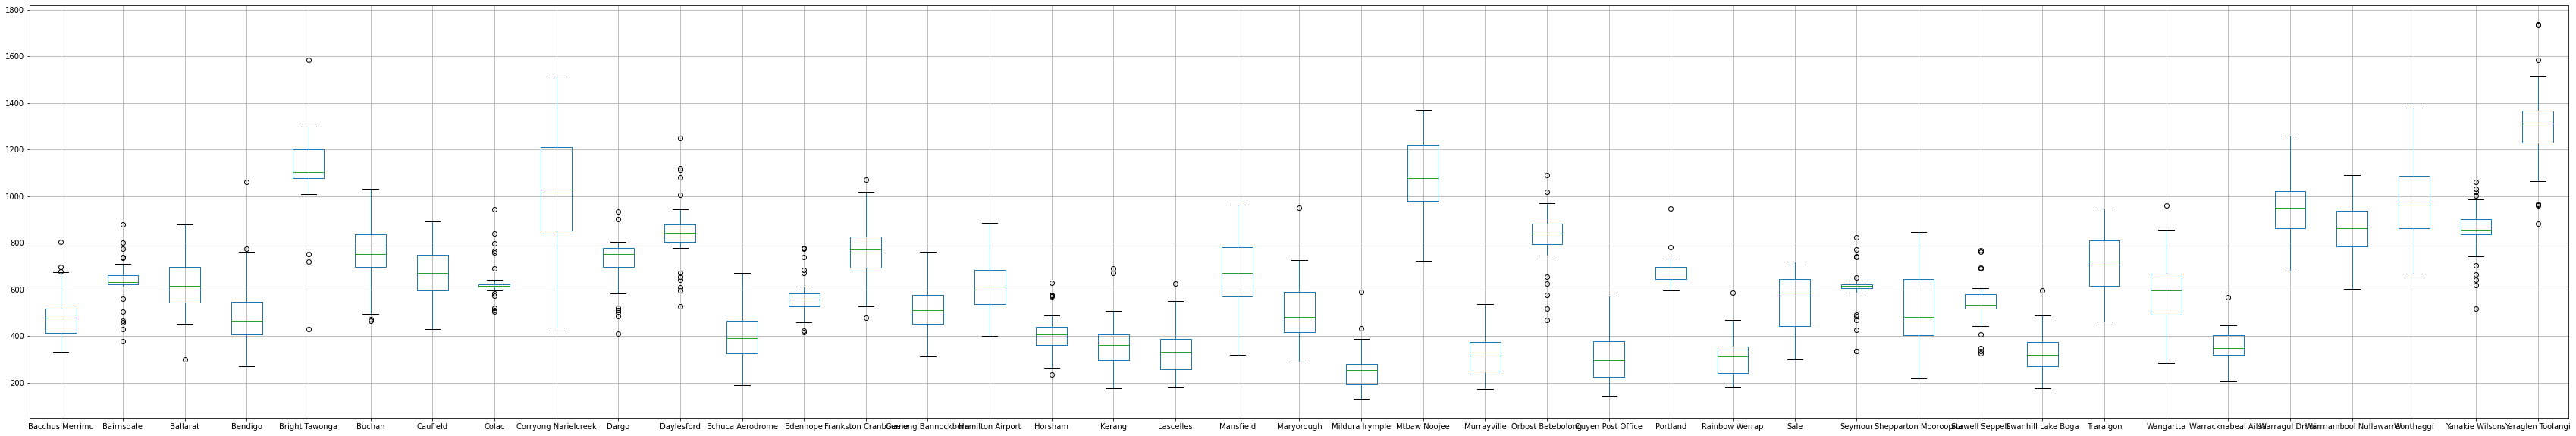

In [103]:
df.boxplot(figsize=(60,10))

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Bacchus Merrimu'}>,
        <AxesSubplot:title={'center':'Bairnsdale'}>,
        <AxesSubplot:title={'center':'Ballarat'}>,
        <AxesSubplot:title={'center':'Bendigo'}>,
        <AxesSubplot:title={'center':'Bright Tawonga'}>,
        <AxesSubplot:title={'center':'Buchan'}>],
       [<AxesSubplot:title={'center':'Caufield'}>,
        <AxesSubplot:title={'center':'Colac'}>,
        <AxesSubplot:title={'center':'Corryong Narielcreek'}>,
        <AxesSubplot:title={'center':'Dargo'}>,
        <AxesSubplot:title={'center':'Daylesford'}>,
        <AxesSubplot:title={'center':'Echuca Aerodrome'}>,
        <AxesSubplot:title={'center':'Edenhope'}>],
       [<AxesSubplot:title={'center':'Euroa'}>,
        <AxesSubplot:title={'center':'Frankston Cranbourne'}>,
        <AxesSubplot:title={'center':'Geelong Bannockburn'}>,
        <AxesSubplot:title={'center':'Hamilton Airport'}>,
        <AxesSubplot:title={

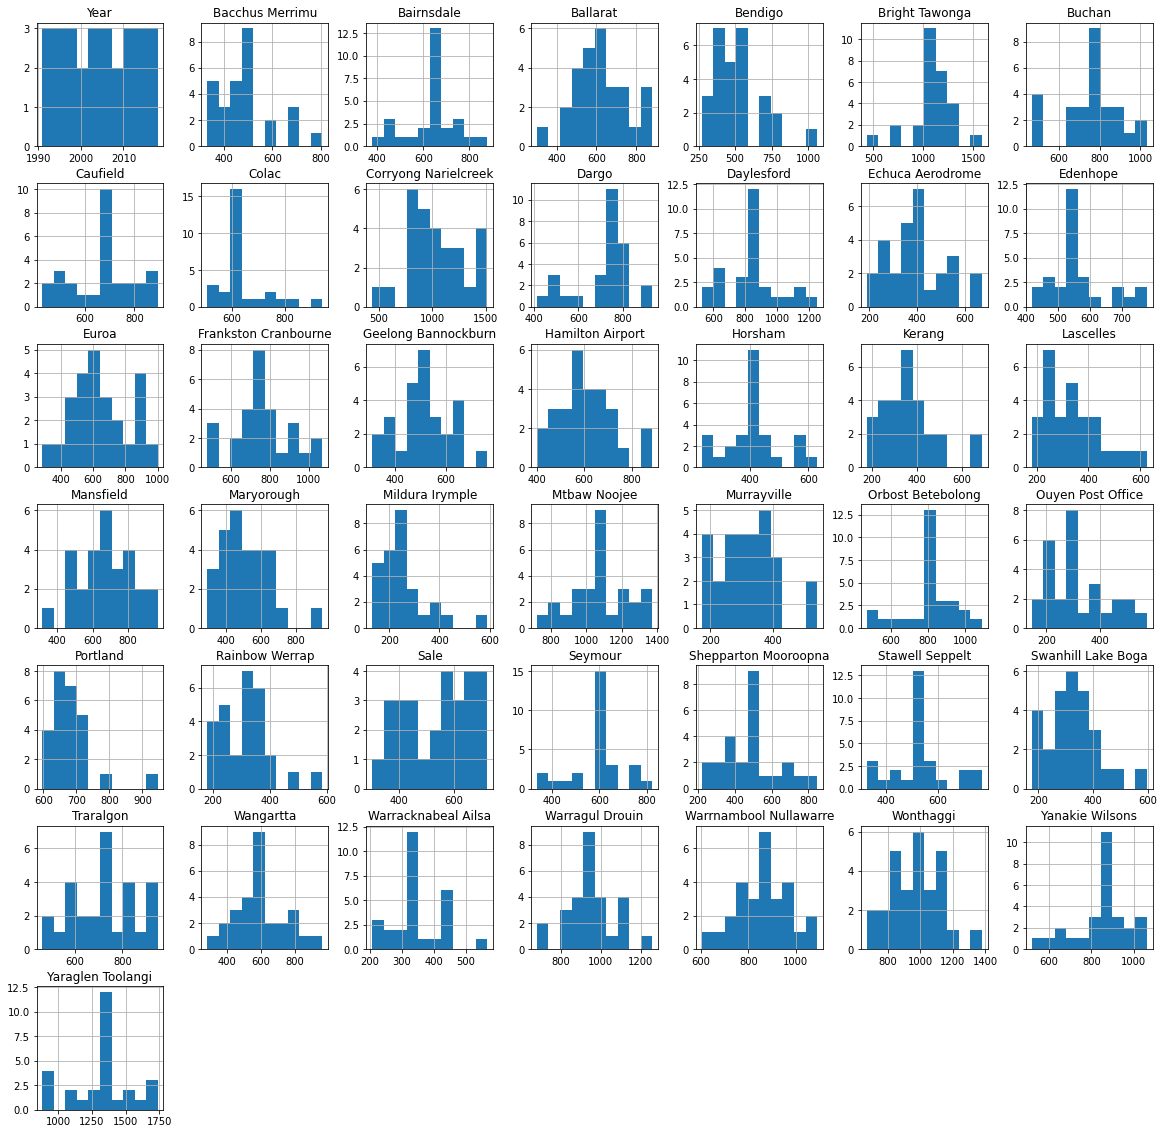

In [89]:
df.hist(figsize=(20,20))

In [90]:
#dfz = df.set_index('Year')

In [91]:
#dfz.to_csv('loc.csv')

In [92]:
#df = df.drop('Euroa', axis=1)

In [93]:
#final_df = pd.read_csv('loc.csv')

In [104]:
for i in df[1:].columns:
    if df[i].isnull().sum() > 0:
        df[i] = df.fillna((df[i].mean()), inplace=True)

array([[<AxesSubplot:title={'center':'Bacchus Merrimu'}>,
        <AxesSubplot:title={'center':'Bairnsdale'}>,
        <AxesSubplot:title={'center':'Ballarat'}>,
        <AxesSubplot:title={'center':'Bendigo'}>,
        <AxesSubplot:title={'center':'Bright Tawonga'}>,
        <AxesSubplot:title={'center':'Buchan'}>],
       [<AxesSubplot:title={'center':'Caufield'}>,
        <AxesSubplot:title={'center':'Colac'}>,
        <AxesSubplot:title={'center':'Corryong Narielcreek'}>,
        <AxesSubplot:title={'center':'Dargo'}>,
        <AxesSubplot:title={'center':'Daylesford'}>,
        <AxesSubplot:title={'center':'Echuca Aerodrome'}>],
       [<AxesSubplot:title={'center':'Edenhope'}>,
        <AxesSubplot:title={'center':'Frankston Cranbourne'}>,
        <AxesSubplot:title={'center':'Geelong Bannockburn'}>,
        <AxesSubplot:title={'center':'Hamilton Airport'}>,
        <AxesSubplot:title={'center':'Horsham'}>,
        <AxesSubplot:title={'center':'Kerang'}>],
       [<AxesSubplot:ti

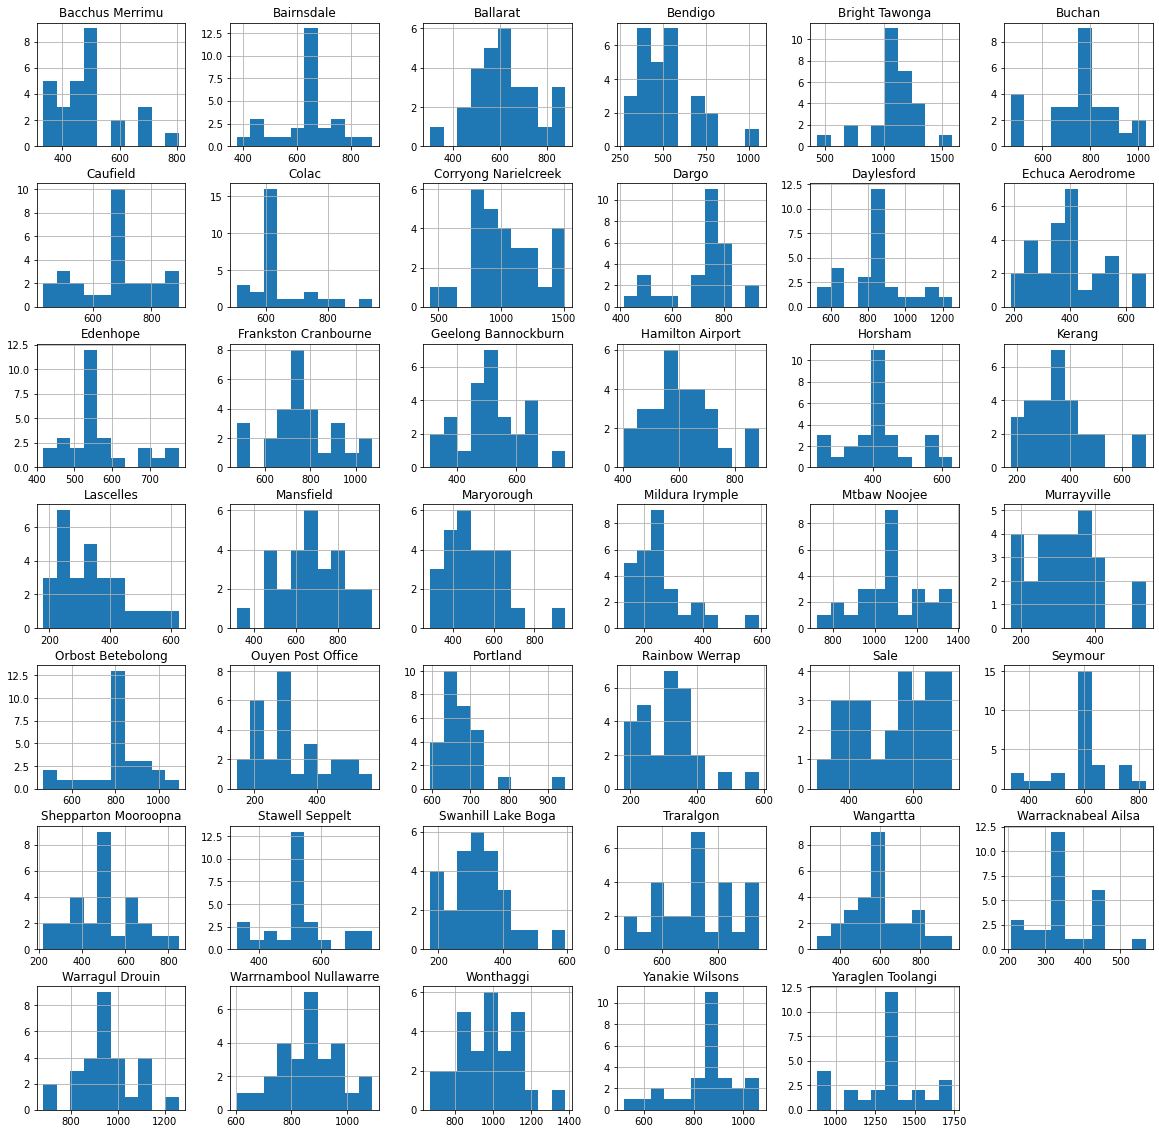

In [105]:
df.hist(figsize=(20,20))

In [95]:
df.drop('Euroa', axis=1, inplace=True)

In [96]:
df = df.set_index('Year')

In [97]:
#final_df['Euroa']

In [98]:
#df['Mildura Iyrample'].plot(kind='bar')

In [99]:
df.to_csv('final_rainfall.csv')